In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def convert(csv):
    xy = np.loadtxt(csv, delimiter=',')
    i = np.argmin(np.sqrt(xy[:, 0]**2 + xy[:,1]**2))
    xy = xy - xy[i]
    new_xy = np.zeros_like(xy)
    new_xy[1:] = np.delete(xy, i, axis=0)
    print(new_xy.shape)
    outname = csv.rstrip('.csv') + '.cfg'
    with open(outname, 'w') as f:
        f.write('# observatory=OVRO_MMA\n')
        f.write('# coordsys=LOC OVRO_MMA\n')
        f.writelines([f'{p[0]:.3f} {p[1]:.3f} 0 5 dsa-{i}\n' for i, p in enumerate(new_xy)])

In [3]:
convert('../20210326-configs/20210226AJ.csv')

(2048, 2)


In [3]:
convert('../20210326-configs/20210226AI.csv')

(2048, 2)


In [6]:
convert('../20210326-configs/20210226W.csv')

(2048, 2)


# Un-elongate W2-17

In [3]:
xyr = np.loadtxt('/home/yuping/Downloads/W2-17-elong.csv', delimiter=' ')

In [8]:
xyr.shape

(2048, 3)

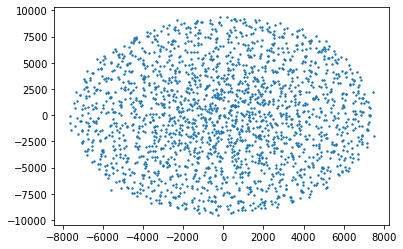

In [14]:
%matplotlib inline
plt.scatter(xyr[:,0], xyr[:,1], s=2)

In [18]:
a = xyr[:,0]
b = xyr[:,1]
dist = np.sqrt((a[:, None] - a)**2 + (b[:,None] - b)**2)

In [23]:
dist = dist + np.diag(1000 * np.ones(2048))

In [27]:
a.max(), a.min(), b.max(), b.min(), a.mean(), b.mean(), a.std(), b.std()

(7505.4377611466,
 -7646.99488176059,
 9354.14800594086,
 -9514.79394392858,
 -6.190885455004274,
 -18.50873754290776,
 3589.1202893708005,
 4533.841341682064)

In [29]:
b.max()/a.max(), b.min()/a.min(), b.std()/a.std()

(1.2463161115484136, 1.2442526889383718, 1.2632179966520096)

In [30]:
fac = 1.267 # from Woody

In [31]:
b = b/fac
a = a - a.mean()
b = b - b.mean()

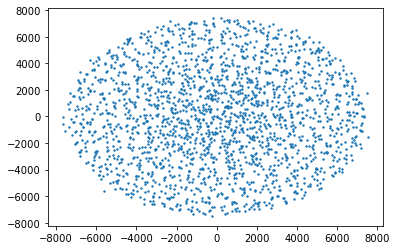

In [33]:
%matplotlib inline
plt.scatter(a, b, s=2)

In [34]:
np.savetxt('../20210326-config/W2-17.csv', np.array([a,b]).T, delimiter=',')

FileNotFoundError: [Errno 2] No such file or directory: '../20210326-config/W2-17.csv'